# Exploratory Data Analysis
In this section, we:
* loaded data 
* checked for missing data
* assigned an integer for each tool stage
* merged data for tool stages into one large dataframe
* cleaned the large dataframe
* filled missing data
* visualized correlation between columns

In [1]:
# load data
import pandas as pd
import numpy as np
chert_hh_1 = pd.read_excel("/content/EXP-00001-Master.xlsx")
chert_hh_2 = pd.read_excel("/content/EXP-00002-Master.xlsx")
chert_sh = pd.read_excel("/content/EXP-00003-Master.xlsx")
obsidian_cr = pd.read_excel("/content/EXP-00004-Master.xlsx")
obsidian_sh = pd.read_excel("/content/EXP-00005-Master.xlsx")


In [5]:
# show dataframe summaries
print('Chert HH1 summary ', chert_hh_1.describe())
print('================================')
print('Chert HH2 summary ', chert_hh_2.describe())
print('================================')
print('Chert SH summary ', chert_sh.describe())
print('================================')
print('Obsidian CR summary ', obsidian_cr.describe())
print('================================')
print('Obsidian SH summary ', obsidian_sh.describe())

Chert HH1 summary           Stage
count  48544.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Chert HH2 summary           Stage
count  49691.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Chert SH summary           Stage
count  14821.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Obsidian CR summary           Stage
count  36682.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
Obsidian SH summary           Stage
count  12814.0
mean       5.0
std        0.0
min        5.0
25%        5.0
50%        5.0
75%        5.0
max        5.0


In [6]:
# check for missing data
print('Chert HH1 missing data? ', chert_hh_1.isna().sum())
print('================================')
print('Chert HH2 missing data? \n', chert_hh_2.isna().sum())
print('================================')
print('Chert SH missing data? \n', chert_sh.isna().sum())
print('================================')
print('\nObsidian CR missing data? \n', obsidian_cr.isna().sum())
print('================================')
print('\nObsidian SH missing data? \n', obsidian_sh.isna().sum())

print('No missing data.')

Chert HH1 missing data?  Id                    0
Img Id                0
Da                    0
Dp                    0
FWidth                0
FLength               0
FThickness            0
ELength               0
EThickness            0
EWidth                0
Volume                0
Area                  0
Perimeter             0
CHull  Area           0
CHull Perimeter       0
Sphericity            0
L/T Ratio             0
T/L Aspect Ratio      0
Compactness           0
Roundness             0
Ellipse Ratio         0
Circularity           0
Solidity              0
Concavity             0
Convexity             0
Extent                0
hash                  0
Surface Area          0
Filter0               0
Filter1               0
Filter2               0
Filter3               0
Filter4               0
Filter5               0
Filter6               0
L/W Ratio             0
W/L Ratio             0
W/T Ratio             0
T/W Ratio             0
CHull Surface Area    0
Sieve          

In [12]:
# add target column, stage, to each dataframe
chert_hh_1['Stage'] = 1
chert_hh_2['Stage'] = 2
chert_sh['Stage'] = 3
obsidian_cr['Stage'] = 4
obsidian_sh['Stage'] = 5

# join dataframes
dfs = [chert_hh_1, chert_hh_2, chert_sh, obsidian_cr, obsidian_sh]
tools_df = pd.concat(dfs)

# remove unecessary columns + row 0
tools_df.drop(columns = ['Id','Filter0','Filter1', 'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash'], inplace = True)
tools_df.drop(0, inplace = True)

# check for missing values again and fill
tools_df.fillna(0, inplace = True)          
print('Missing data filled.')
tools_df.isna().sum()

Missing data filled.


Img Id                0
Da                    0
Dp                    0
FWidth                0
FLength               0
FThickness            0
ELength               0
EThickness            0
EWidth                0
Volume                0
Area                  0
Perimeter             0
CHull  Area           0
CHull Perimeter       0
Sphericity            0
L/T Ratio             0
T/L Aspect Ratio      0
Compactness           0
Roundness             0
Ellipse Ratio         0
Circularity           0
Solidity              0
Concavity             0
Convexity             0
Extent                0
Surface Area          0
L/W Ratio             0
W/L Ratio             0
W/T Ratio             0
T/W Ratio             0
CHull Surface Area    0
Sieve                 0
Ellipticity           0
Fiber Length          0
Fiber Width           0
Stage                 0
Transparency          0
Curvature             0
Angularity            0
dtype: int64

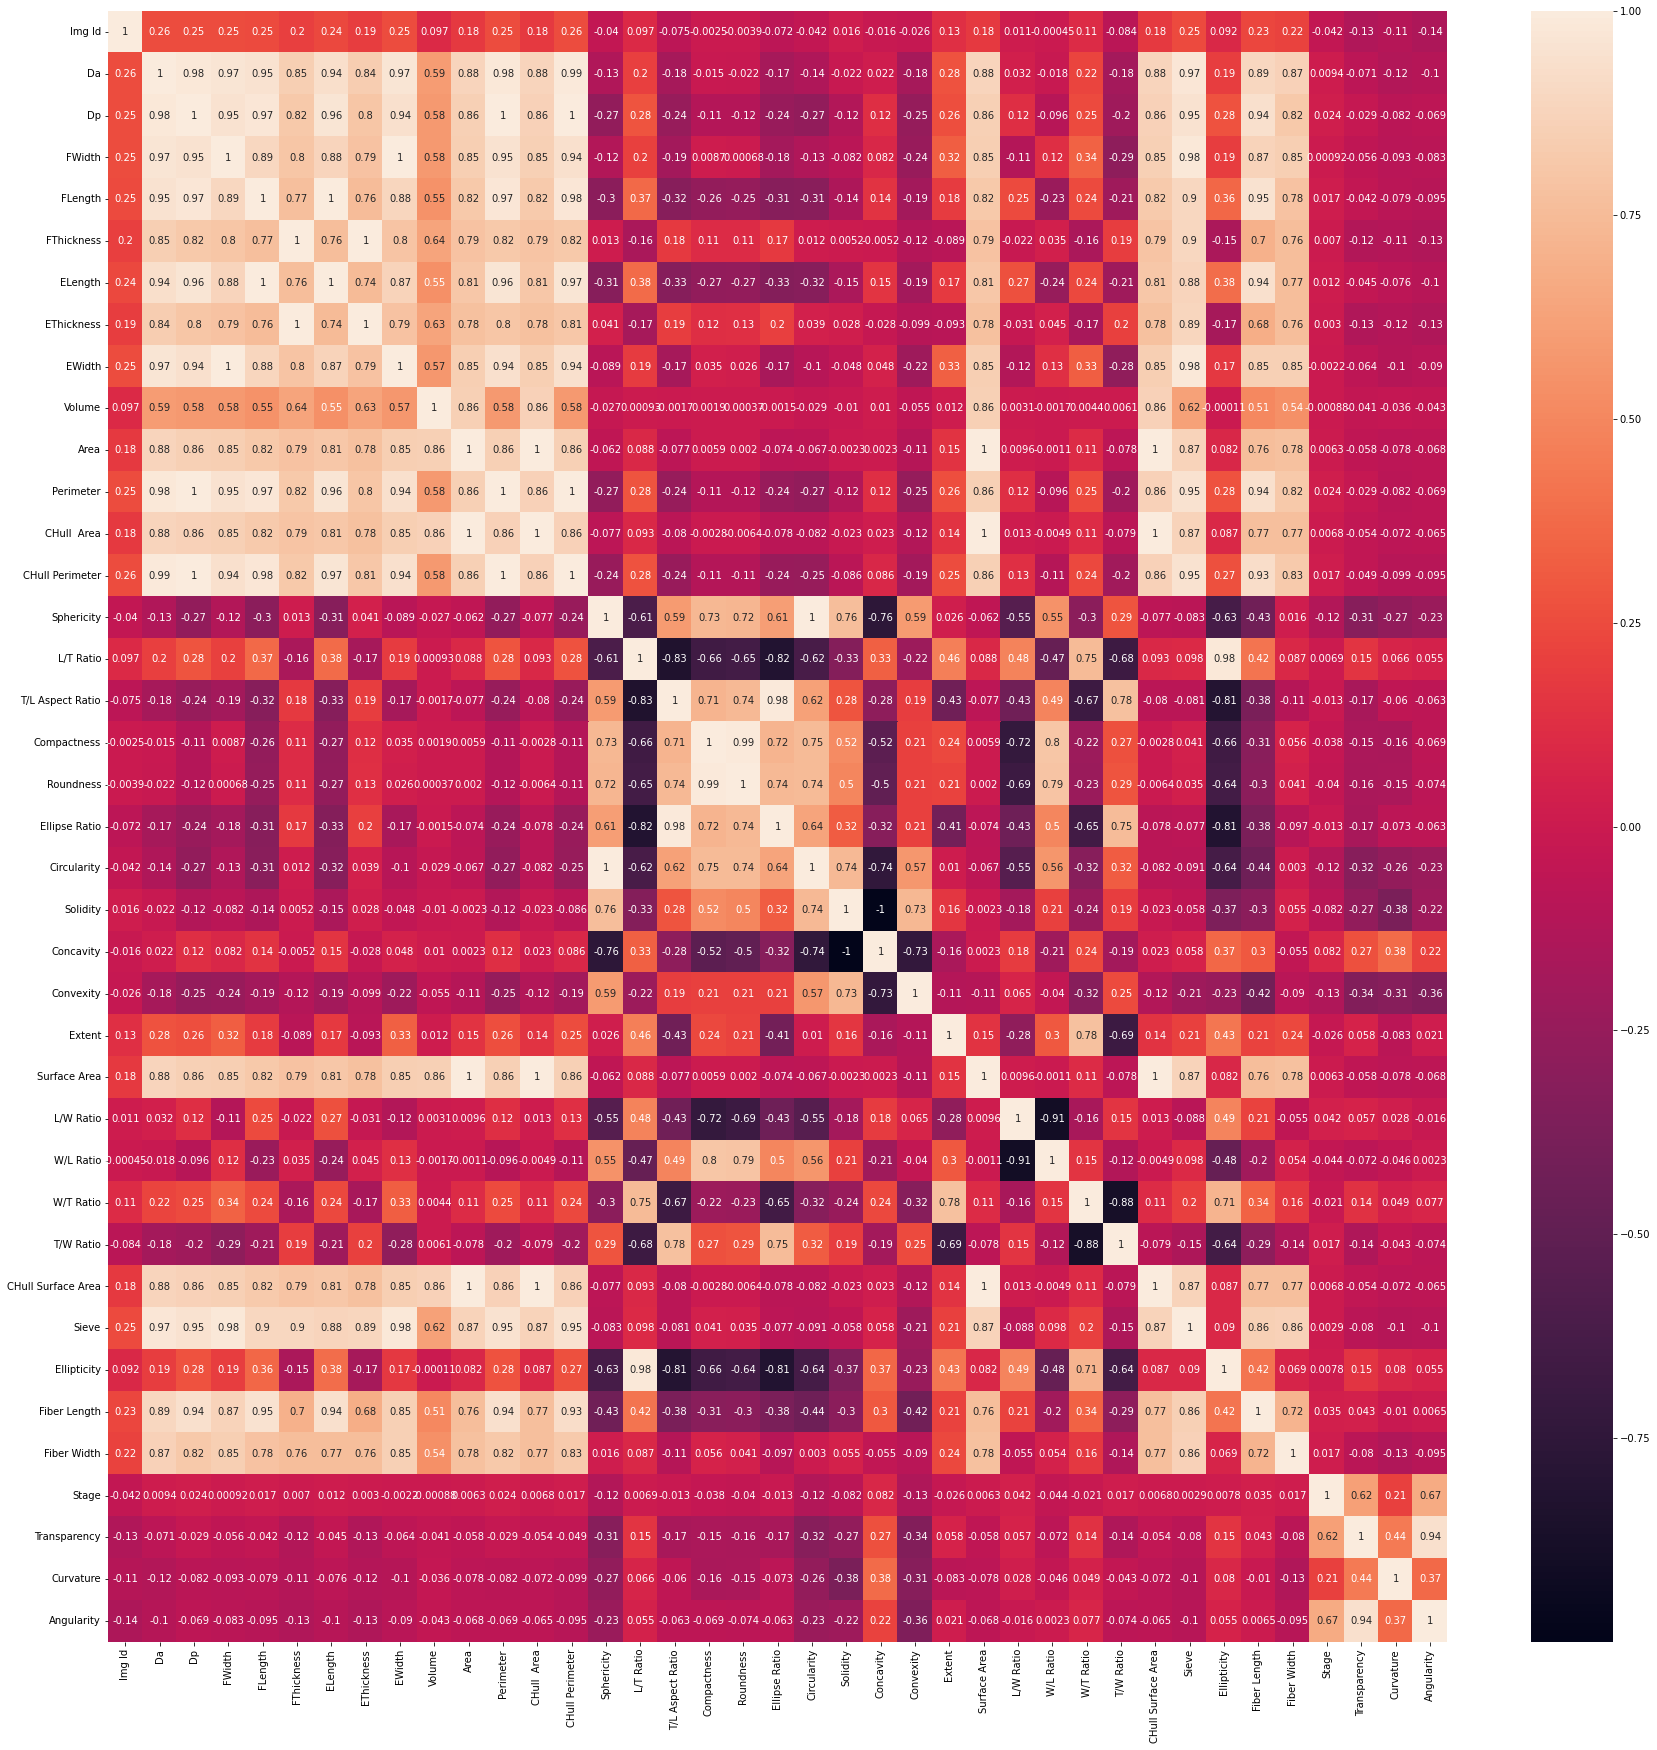

In [18]:
# show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (30,30))
sns.heatmap(tools_df.corr(), annot = True)

# Modeling
